# This Person Might Exist - Demo Notebook

### In this notebook:

- **Generating samples of people with `PersonGenerator`**

- **Generating samples of email addresses with `gen_email()`**

- **Generating expenses and budgets with `quick_expenses()`**

- **Exporting datasets**

- **Name Tokenization**

# PersonGenerator

- **Generating samples of people with `PersonGenerator`**
    - Supported columns:
        - Age
        - Name
        - Email
        - Password
        - Phone
        - Gender
        - Marital Status
        - Education
        - Occupation
        - Accommodation
        - Living with
        - Everyday satisfaction
        - Health

    - Default parameters:
        - Gender distribution
            - {'female': 0.5,'male': 0.5, 'nb': 0.02},
        - Age distribution 
            - {'mean': 42, 'std': 20, 'lower_lim': 15, 'upper_lim': 100},
        - Health distribution
            - {'mean': 3, 'std': 1, 'skewness': 0}

## Generating one sample

Create an instance of `PersonGenerator` and call the class method `generate_person()` to get a random sample.

In [1]:
from main import PersonGenerator, value_mapper

pg = PersonGenerator(anonymize=False)
pg.generate_person()[:4]

(26, 'Karl Lin', 'karllin@icloud.com', 'iloveyou89')

The first four values defaults to Age, Name, Email and Password.

## Generating multiple samples

With a list comprehension we can generate multiple samples. We then call the `value_mapper` to get labels for additional rows, such as Gender, Martial Status, Education, Occupation and so on.

In [2]:
from main import value_mapper

multiple_samples = [pg.generate_person() for n in range(3)]
value_mapper(multiple_samples)

,Age,Name,Email,Password,Phone,Gender,Marital Status,Education,Occupation,Accommodation,Living with,Everyday satisfaction,Health
0,62,Edward Knutsson,edwardknutsson@glocalnet.se,12345qwert29,0761122101,Male,Married/Common-law partner,Folk high school/Vocational education,Employed,"Townhouse, cottage, or similar",Family (Partner and children/parents and sibli...,3,1
1,63,Sofie Miller,sofiemiller61@icloud.com,denver19,0703525373,Female,Single,Incomplete academic education,Employed,"Townhouse, cottage, or similar",Family (Partner and children/parents and sibli...,2,2
2,39,Ingemar Rodríguez,ingerodr_guez@icloud.com,lizard59,0732765438,Male,Single,Incomplete academic education,Student,Rental apartment,Spouse/partner,3,3


`value_mapper` defaults to English column names and row values, but can be changed to Swedish:

In [3]:
value_mapper(multiple_samples, language="swedish")

,Ålder,Namn,Email,Lösenord,Telefon,Kön,Civilstånd,Utbildningsnivå,Sysselsättning,Boende,Tillsammans_med,Vardagstillfredsställelse,Hälsa
0,62,Edward Knutsson,edwardknutsson@glocalnet.se,12345qwert29,0761122101,Man,Gift/Sambo,Fölkhögskola/Yrkesutbildning,Arbete,"Radhus, villa eller liknande",Familj (Partner och barn/ föräldrar och syskon),3,1
1,63,Sofie Miller,sofiemiller61@icloud.com,denver19,0703525373,Kvinna,Ogift,Ofullständig akademisk utbildning,Arbete,"Radhus, villa eller liknande",Familj (Partner och barn/ föräldrar och syskon),2,2
2,39,Ingemar Rodríguez,ingerodr_guez@icloud.com,lizard59,0732765438,Man,Ogift,Ofullständig akademisk utbildning,Studier,Hyresrätt,Make/maka/sambo,3,3


To add other languages, edit the `TranslationMap` in `mapping.py`.

## Default distributions

In [4]:
person_list = [pg.generate_person() for n in range(1024)]
df = value_mapper(person_list)

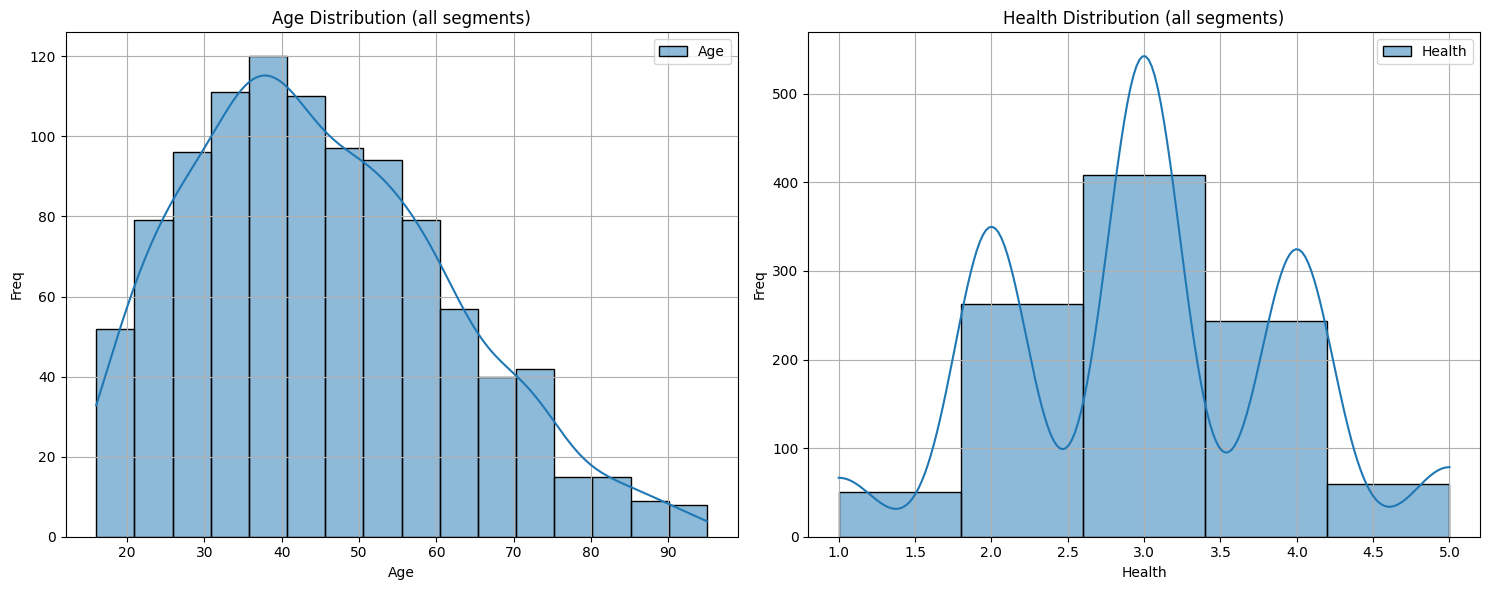

In [5]:
from utils.plots import get_histogram_subplots
get_histogram_subplots([df['Age'], df['Health']],['Age Distribution (all segments)','Health Distribution (all segments)'],['Age','Health'],['Freq','Freq'],bins=[16, 5])

## Creating custom distributions

We can create custom distributions by modifying the input arguments of `generate_person`.

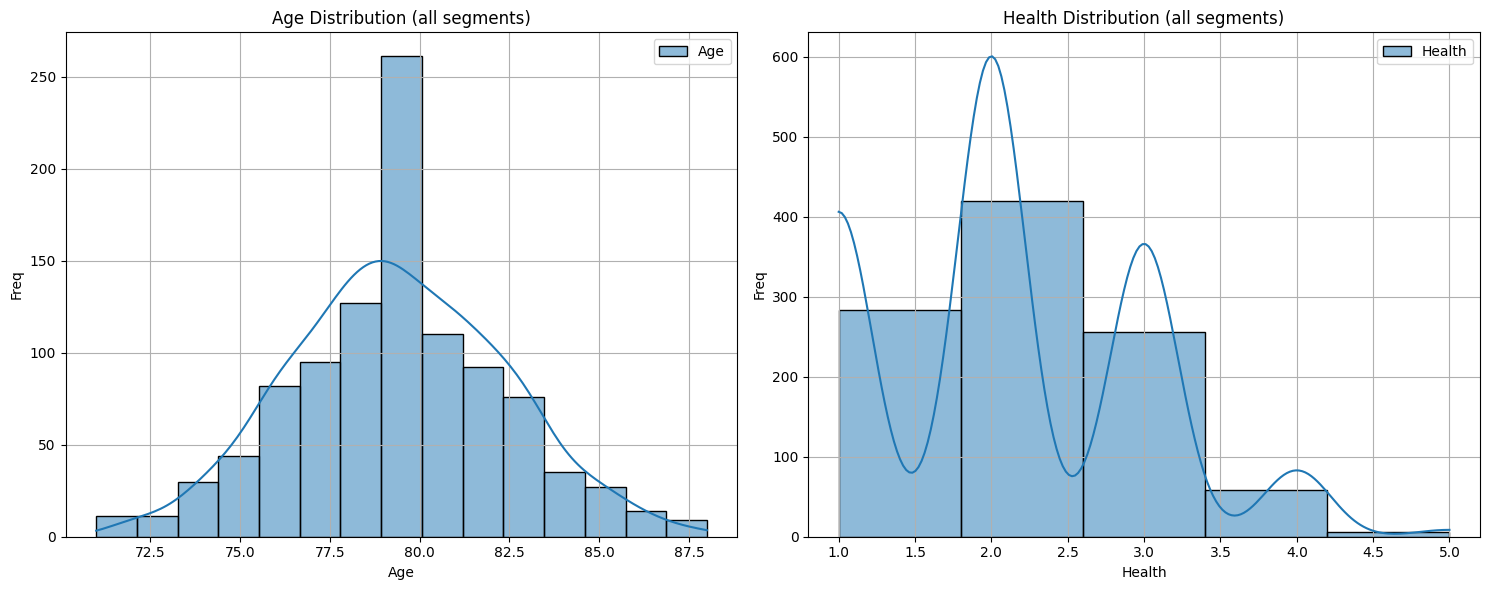

In [6]:
gender = {'female': 0.8,
          'male': 0.2,
          'nb': 0.02,
          }

age = {'mean': 80, 
       'std': 3, 
       'lower_lim': 0,
       'upper_lim': 120,
       }

health = {'mean': 2,
          'std': 1,
          'skewness': -0.1,
          }

custom_person_list = [pg.generate_person(dist_gender=gender, dist_age=age, dist_health=health) for n in range(1024)]

df = value_mapper(custom_person_list)
get_histogram_subplots([df['Age'], df['Health']],['Age Distribution (all segments)','Health Distribution (all segments)'],['Age','Health'],['Freq','Freq'],bins=[15, 5])

# Custom email generation

Email generation is part of `PersonGenerator`, but can be accessed separately.

- **Generating samples of email addresses with `gen_email()`**
    - Parameters:
        - Name
        - Age
        - Anonymize
        - Add birthdate probabilities
        - Boomer age
        - Boomerf factor
        - Domain distribution
        - Force domain
        - Century removal probability
        - Nickname probabiliry
        - Mean age
        - STD age
        - Millenial mail probability
        - Anonymize mail probability
        - Apple hidden mail probability
        - "asdf" mail probability
        - Force formail mail
        - Allow foreign characters



Simply calling the `gen_email()` will generate a random email with default values.

In [7]:
from _email import gen_email
gen_email()

'vazqirina@live.se'

We can set additional parameters. Check out `_email.py` for details.

In [8]:
gen_email(age=42, force_formal=True, force_domain="backaplan.se")

'tova.ekstedt@backaplan.se'

In [9]:
gen_email(age=32, millenial_mail_p=1)

'420dude92@live.se'

---

# Generating synthetic expenses

Expenses can be generated alongside any person table.

- **Generating tables of expenses with `quick_expenses()`**
    - Parameters:
        - Category:
            - Animals & Pet Supplies
            - Apparel & Accessories
            - Arts & Entertainment
            - Baby & Toddler
            - Business & Industrial
            - Cameras & Optics
            - Electronics
            - Food, Beverages & Tobacco
            - Furniture
            - Hardware
            - Health & Beauty
            - Home & Garden
            - Luggage & Bags
            - Media
            - Office Supplies
            - Religious & Ceremonial
            - Software
            - Sporting Goods
            - Toys & Games
            - Vehicles & Parts
        - Keywords
            - Any

#TODOs:
- Price ranges, make class

In [10]:
from main import quick_expenses

quick_expenses(n_people=4, n_expenses=200, keyword='office')

,Category,Product,Price,Currency,Datetime,Person
0,Home & Garden,Musical Notes Cast Iron Bookends - Metal - Pair,200.0,SEK,2024-02-09 16:17:36,Ragnhild Bauer
1,Luggage & Bags,DELSEY SECURFLAP - SILVER,200.0,SEK,2024-02-11 15:27:46,Henny Hoffmann
2,Furniture,Xander Desk Antique Gold,200.0,SEK,2024-02-08 18:15:21,Henny Hoffmann
3,Office Supplies,Wooden Portable Folding French Easel,200.0,SEK,2024-02-07 12:35:52,Ingrid Lundgren
4,Furniture,Dresden Executive Desk,200.0,SEK,2024-01-31 15:28:34,Ragnhild Bauer
...,...,...,...,...,...,...
195,Vehicles & Parts,Wood Beaded Comfort Seat Cushion Comfort Massa...,200.0,SEK,2024-02-07 13:58:58,Aurora Wilson
196,Luggage & Bags,DELSEY SECURFLAP - SILVER,200.0,SEK,2024-02-04 18:25:57,Henny Hoffmann
197,Home & Garden,Musical Notes Cast Iron Bookends - Metal - Pair,200.0,SEK,2024-02-05 15:10:46,Ragnhild Bauer
198,Apparel & Accessories,Green Ikat Box Bag,200.0,SEK,2024-01-31 15:06:18,Ingrid Lundgren


# Exporting

Run `main.py` to export.
See variables for export settings:
```
anonymize = False
rows = 1000
export_csv = True
export_excel = False
export_sql = False
export_path = 'Exports'
file_name ='tpme_export'
```

---

# Name Tokenizer

We can feed our name buckets into the tokenizer as such:

In [11]:
from tokenizer import tokenize, get_corpus

name_dict = tokenize(get_corpus('Data/name_corpus.pkl'))

Found 12 keys in corpus: dict_keys(['m_sweden_gpt', 'f_sweden_gpt', 'f_norwa_list', 'm_scandi_gpt', 'f_scandi_gpt', 'm_slavic_gpt', 'f_slavic_gpt', 'last_swe', 'last_gpt_eur0', 'last_gpt_eur2', 'last_gpt_asia', 'last_gpt_mena']).
Done extracting nested dictionaries and lists.

Tokenization running. Found 643 words.
split_type='median'
apply_rules=None

Total tokens : 1286
Unique tokens: 695
Allowed pairs: 241165

Top 3 tokens:
"ma", freq: 26, token: 97
"sson", freq: 16, token: 433
"an", freq: 15, token: 14

Example generations (token pairs):
Liabo, 265 190
Ofdal, 31 520
Eccajako, 270 530


By default, `tokenize` will extract all nested lists and dictionaries from the input.

The words will be split and tokenized.

There is of course a trade-off in the amount of tokens, the possible combinations of words and coputational efficiency.

In [12]:
from tokenizer import get_word

get_word(name_dict, 22)

'ha'

### Combat redundancy
When the tokens are generated, we might end up with redundancy.

In [13]:
hanna = [22, 6, 287, 14, 173, 253, 193, 249, 154, 287]
for h in hanna:
    print(get_word(name_dict, h))

ha
han
a
an
ann
anna
nn
nna
na
a


In [14]:
from tokenizer import check_redundacy

print(check_redundacy().sample(10))

        Name                                             Tokens
339     Emma                         [159, 46, 84, 84, 97, 287]
10    Ingvar   [250, 169, 20, 625, 382, 160, 21, 287, 147, 251]
88    Jesper  [13, 110, 149, 159, 194, 634, 9, 63, 150, 159,...
9       Erik         [159, 10, 543, 251, 372, 16, 250, 19, 341]
268  Andreas  [287, 14, 3, 319, 251, 576, 370, 60, 159, 291,...
269   Sondre       [634, 180, 318, 35, 325, 319, 251, 576, 159]
554   Torres  [32, 70, 35, 251, 346, 251, 576, 585, 159, 194...
370   Sandra  [634, 197, 343, 459, 407, 287, 14, 3, 377, 251...
67    Stefan             [634, 38, 120, 159, 241, 121, 287, 14]
242    Simon        [634, 307, 250, 113, 84, 239, 184, 35, 325]


Maybe heaps could be used here. TODO

Heaps are binary trees for which every parent node has a value less than or equal to any of its children.